# MINST Kaggle Competition with Tensorflow

Import relevant libaries

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.models import Model
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.utils import np_utils

## Load Image Data

In [2]:
df = pd.read_csv('data/train.csv', sep=',', header=0)

In [3]:
# read labels
Y = df[['label']].as_matrix()

# read image data
pixels = [col for col in df.columns if not col == 'label']
X = df[pixels].as_matrix()

print("X shape", X.shape)
print("Y shape", Y.shape)

X shape (42000, 784)
Y shape (42000, 1)


First 10 labels:

   [1 0 1 4 0 0 7 3 5 3]

First 10 images:


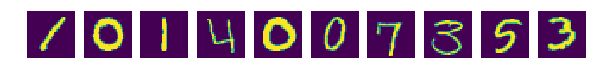

In [4]:
N = 10
print("First %s labels:\n" % (N))
print("   %s\n" % Y[:N].flatten())
print("First %s images:" % N)
fig = plt.figure(1, figsize=(10,10))
for i in range(N):
    img = X[i].reshape(28,28)
    fig.add_subplot(1, N, i+1)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')
plt.show()

## Create Neural Network Classifier

In [ ]:
batch_size = 32 # in each iteration, we consider 32 training examples at once
num_epochs = 200 # we iterate 200 times over the entire training set
kernel_size = 3 # we will use 3x3 kernels throughout

Split data into X_train/Y_train and X_test/Y_test groupings

In [21]:
np.random.seed(42)
r = np.random.rand(X.shape[0])
X_train = X[r<0.95]
X_test = X[r>=0.95]
Y_train = Y[r<0.95]
Y_test = Y[r>=0.95]
assert X_train.shape[0] == Y_train.shape[0]
assert X_test.shape[0] == Y_test.shape[0]